## Import Some Libraries  

In [98]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [99]:
################################## Data Analysis & Calculation ##################################
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



## Data Import 

In [100]:
#to import the data
New = pd.read_csv(r"C:\Users\Digambar\OneDrive\Desktop\Imarticus Learing\Machine Learning\Supervised Machie Learning\Logistics Regression\winequalityN.csv")
New

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Preprocessing

#### # Datatype and conversion
 

In [101]:
#Checking information like Datatype, Column, Rows entries
New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [102]:
#Describe the Data
New.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Checking Missing Value   

In [103]:
# count the number of NaN values in each column
New.isnull().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### # Replacing Missing value by Mode 

In [104]:
for column in ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','pH','sulphates']:
    New[column].fillna(New[column].mode()[0], inplace=True)

In [105]:
New.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [106]:
#View top 5 rows
New.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### # Checking & Treatment the otlier 

<AxesSubplot:>

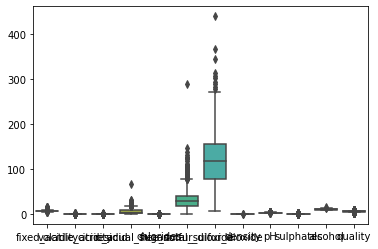

In [107]:
#Checking outlier present or not
sns.boxplot(data=New)

In [108]:
#if outlier is present then remove it 
for i in New:
    if New[i].dtypes in ("float64","int64"):
        q1 = New[i].quantile(0.25)
        q3 = New[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        New[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:>

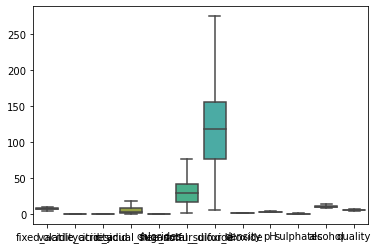

In [109]:
#After removing the outlier
sns.boxplot(data=New)

<AxesSubplot:ylabel='volatile_acidity'>

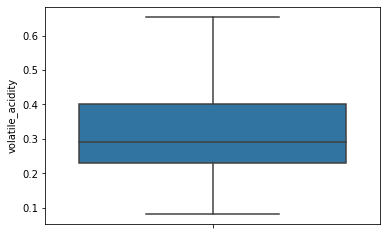

In [110]:
#After removing the outlier
sns.boxplot(y='volatile_acidity',data=New)  # Single Variable

In [111]:
#if outlier is present then remove it 
for i in New:
    if New[i].dtypes in ("float64","int64"):
        q1 = New[i].quantile(0.25)
        q3 = New[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        New[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:ylabel='volatile_acidity'>

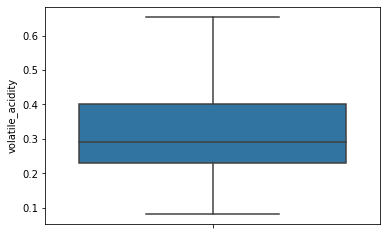

In [112]:
#After removing the outlier
sns.boxplot(y='volatile_acidity',data=New)  # Single Variable

## Data Visualization


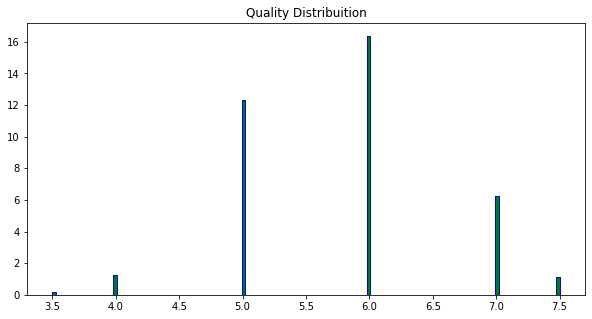

In [113]:
plt.figure(figsize =(10, 5))
plt.title('Quality Distribuition')
plt.hist(New.quality , bins =150 , color = "g" ,density =True)
plt.hist(New.quality , bins =150 , color = "b" ,density =True , histtype='step' )
plt.show()

<AxesSubplot:xlabel='quality', ylabel='type'>

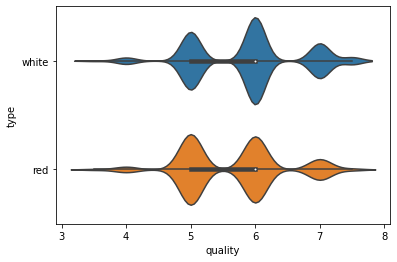

In [114]:
sns.violinplot(data =New, y ="type", x = "quality" )

<AxesSubplot:>

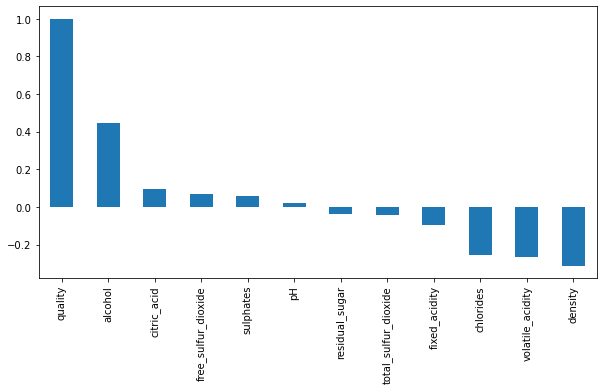

In [115]:
corr_mat=New.corr()
plt.figure(figsize=(10,5))
corr_mat['quality'].sort_values(ascending=False).plot(kind='bar')

# 1) Logistic Regression

## Data Visulization  

#### # Bad wine analysis 

In [116]:
New.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [117]:
(4898/6497)*100 # 75.40 % is white wine in data 

75.38864091118978

<AxesSubplot:xlabel='type', ylabel='count'>

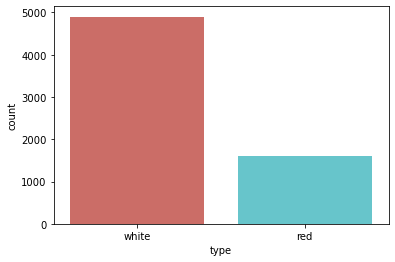

In [118]:
sns.countplot(x='type',data=New,palette='hls')

In [119]:
import plotly.express as px

fig = px.pie(New,names='type',color='type',
             color_discrete_map={'white ':'white',
                                 'red':'red'})
fig.show()

Text(0, 0.5, 'quality')

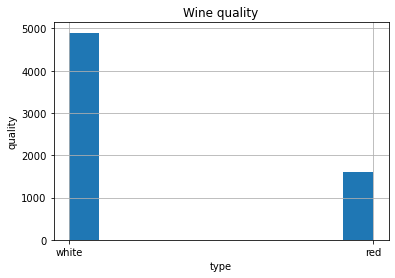

In [126]:
New.type.hist()
plt.title('Wine quality')
plt.xlabel('type')
plt.ylabel('quality')
#plt.savefig('Income_age')

Text(0, 0.5, 'Frequency')

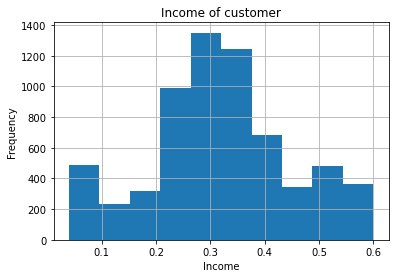

In [121]:
New.citric_acid.hist()
plt.title('Income of customer')
plt.xlabel('Income')
plt.ylabel('Frequency')
#plt.savefig('Income_age')

#### # Reject wine data = Bad wine

In [122]:
New_yes= New[New["type"] == "white"]  # 269

New_yes

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,white,6.6,0.32,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,white,6.5,0.28,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,white,5.5,0.29,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


## Breaking Data into Two Part
* Quantitative Variable
* Qualitative Variable 

In [57]:
New.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [58]:
New.select_dtypes(include=[np.number]).columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [59]:
# Qualitative Variable
Quantitative_Variable = New[New.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0


In [60]:
Qualitative_Variable = New[New.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,type
0,white
1,white
2,white


#### # Converting qualitative Variable into number

In [61]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,type
0,1
1,1
2,1
3,1
4,1


#### # Combining the data set

In [62]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


## Data Partition 

In [63]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('type', axis = 1)
Y = Final_combined[['type']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=85)

In [64]:
y_train

,type
3435,1
1164,1
4225,1
841,1
5971,0
...,...
5715,0
1587,1
5828,0
5280,0


In [65]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
2934,5.3,0.210,0.29,0.7,0.0280,11.0,66.0,0.99215,3.30,0.400,9.8,5.0
6426,7.9,0.290,0.49,2.2,0.0960,21.0,59.0,0.99714,3.31,0.670,10.1,6.0
4985,7.7,0.490,0.26,1.9,0.0620,9.0,31.0,0.99660,3.39,0.640,9.6,5.0
1237,7.3,0.240,0.39,3.6,0.0240,35.0,116.0,0.99280,3.17,0.510,10.9,5.0
4433,6.9,0.560,0.26,10.9,0.0600,55.0,193.0,0.99690,3.21,0.440,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4114,7.5,0.210,0.29,1.5,0.0460,35.0,107.0,0.99123,3.15,0.450,11.3,6.0
6400,7.3,0.585,0.18,2.4,0.0780,15.0,60.0,0.99638,3.31,0.540,9.8,5.0
866,6.9,0.180,0.36,1.3,0.0360,40.0,117.0,0.99340,3.27,0.855,9.5,7.0
3681,7.0,0.220,0.26,9.2,0.0270,37.0,122.0,0.99228,3.06,0.340,12.5,7.5


## Model Building 

### Hypothesis <br>
###### H0 :- There is no log linear relationship between wine_quality and all independent Variable <br>
   ######  vs <br>
###### H1 :- There is  log linear relationship between wine_quality and all independent Variable <br> <br>
###### Alpha = 0.05 (5%)


## Method 1 - Logistics Regression 

#Needed to run the logistic regression
import statsmodels.formula.api as smf
result=smf.logit("Loan_Status~C(Gender)+C(Married)+C(Education)+C(Self_Employed)+C(Previous_Loan_Taken)+C(Property_Area)+C(Customer_Bandwith)+C(Tenure_group)+Age+Dependents+LoanAmount+Cibil_Score+ApplicantIncome",data=train).fit()
print(result.summary2())

## Method 2 - Logistics Regression 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [67]:
output.intercept_  # beta

array([1.72150845])

In [68]:
output.coef_  # Beta 1 -- 

array([[-0.71679993, -8.89523686,  1.48744686,  0.16823938, -1.51889445,
        -0.0480783 ,  0.06200591,  1.59979086, -1.12936172, -7.01986841,
         0.73455485,  0.13535075]])

In [69]:
output.n_features_in_

12

We Reject Ho <br>
There is  log linear relationship between wine_quality and all independent Variable

##  Predictions on Train Dataset 

In [70]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
3435,6.5,0.240,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3,6.0,1
1164,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6.0,1
4225,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5.0,1
841,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7.0,1
5971,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6.0,0


In [71]:
train['Predicted']=output.predict(X_train)
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,Predicted
3435,6.5,0.240,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3,6.0,1,1
1164,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6.0,1,1
4225,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5.0,1,1
841,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7.0,1,1
5971,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6.0,0,0


## Model Performance Metric 

In [72]:
#first perform the confusion matric
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['type'])
matrix

array([[1213,   40],
       [  55, 3889]], dtype=int64)

#### # Accuracy with Sensitivity and Specificity of Train Data 

In [73]:
from sklearn.metrics import classification_report
print(classification_report(train['type'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1268
           1       0.99      0.99      0.99      3929

    accuracy                           0.98      5197
   macro avg       0.98      0.97      0.98      5197
weighted avg       0.98      0.98      0.98      5197



* Accuracy of Model is 98%,Hence Model is Over Fit <br>
* Accuracy of white wine Capture by Model is 99% ( Sensitivity ) <br>
* Accuracy of red wine Capture by Model is 96% (Specificity)

## Predictions on Test Dataset 

In [74]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
2934,5.3,0.21,0.29,0.7,0.028,11.0,66.0,0.99215,3.30,0.40,9.8,5.0,1
6426,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6.0,0
4985,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5.0,0
1237,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5.0,1
4433,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.4,5.0,1


In [75]:
test['Predicted']=output.predict(X_test)
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,Predicted
2934,5.3,0.21,0.29,0.7,0.028,11.0,66.0,0.99215,3.30,0.40,9.8,5.0,1,1
6426,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6.0,0,0
4985,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5.0,0,0
1237,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5.0,1,1
4433,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.4,5.0,1,1


## Model Performance Metrics on Test data

In [76]:
#first we perform the confusion matrics
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['type'])
print(matrix)

[[307   9]
 [ 24 960]]


#### # Accuracy with Sensitivity and Specificity of Test Data 

In [77]:
from sklearn.metrics import classification_report
print(classification_report(test['type'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       331
           1       0.98      0.99      0.98       969

    accuracy                           0.97      1300
   macro avg       0.97      0.96      0.97      1300
weighted avg       0.97      0.97      0.97      1300



* Accuracy of Model is 97%,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 99% ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 93%

## Coefficient 

* For future Prediction below 4 variable data is mandatory
<br>
* Note :- If anyone is not present output will not be reliable

In [78]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,1.721508


In [79]:
New.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [80]:
rows=[ 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

abc=pd.DataFrame(output.coef_.T,index=rows,columns=['Coefficient'])
abc

,Coefficient
fixed_acidity,-0.716800
volatile_acidity,-8.895237
citric_acid,1.487447
residual_sugar,0.168239
chlorides,-1.518894
free_sulfur_dioxide,-0.048078
total_sulfur_dioxide,0.062006
density,1.599791
pH,-1.129362
sulphates,-7.019868


In [81]:
Model_Values.append(abc)

,Coefficient
Intercept,1.721508
fixed_acidity,-0.716800
volatile_acidity,-8.895237
citric_acid,1.487447
residual_sugar,0.168239
chlorides,-1.518894
free_sulfur_dioxide,-0.048078
total_sulfur_dioxide,0.062006
density,1.599791
pH,-1.129362


#### Finally 
* Accuracy of Model is 97%,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 99% ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 93%


## Liner Regression Finish 

# --------------------------------------------------------- 

# 2) Decision Tree 

# **************************** 

## Model Building 

In [82]:
#Import Tree Classifier model
from sklearn import tree

New = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
New.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

## Plotting the Tree 

##### Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [83]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3435,1,6.5,0.240,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3,6.0
1164,1,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6.0
4225,1,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5.0
841,1,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7.0
5971,0,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6.0


In [84]:
train.type.value_counts(ascending=False)

1    3929
0    1268
Name: type, dtype: int64

In [85]:
independent_variable = list(train.columns[1:])
independent_variable

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

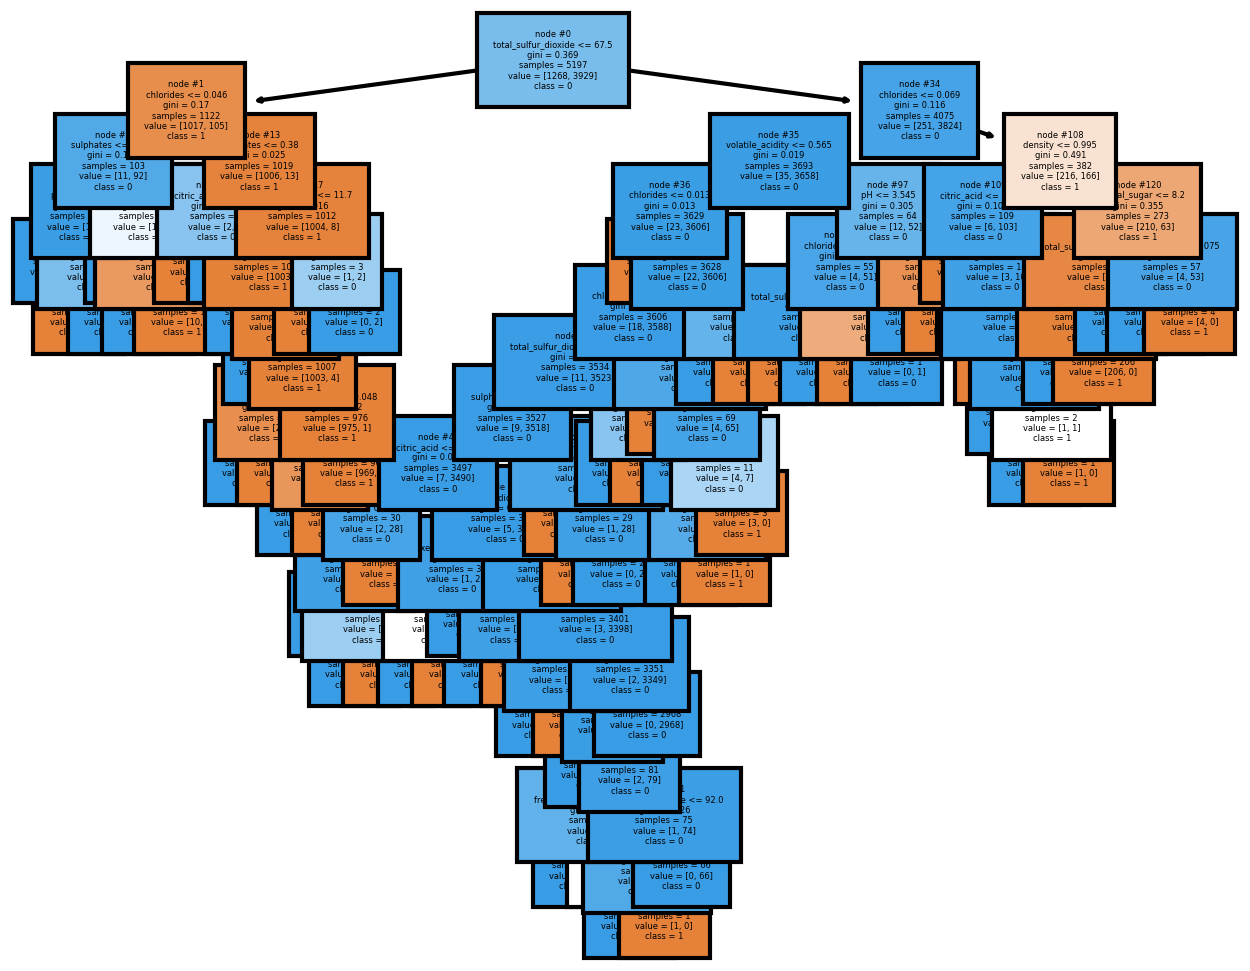

In [86]:
from sklearn import tree
import matplotlib.pyplot as plt

type=["1", "0"]  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(New,  # Model 
               feature_names = independent_variable,  # column name
               class_names=type, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

## Prediction on train dataset 

In [87]:
train.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3435,1,6.5,0.240,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3,6.0
1164,1,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6.0
4225,1,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5.0
841,1,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7.0
5971,0,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6.0


In [88]:
train['Predicted']=New.predict(X_train)  # MODEL = dt
train.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Predicted
3435,1,6.5,0.240,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3,6.0,1
1164,1,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6.0,1
4225,1,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5.0,1
841,1,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7.0,1
5971,0,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6.0,0


## Model Performance Matrics 

In [89]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['type'])
print(matrix)

[[1268    1]
 [   0 3928]]


#### # Accuracy with Sensitivity and Specificity of Train Data 

In [90]:
from sklearn.metrics import classification_report
print(classification_report(train['type'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      3929

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197




* Accuracy of Model is 100 %,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 100 % ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 100 %


#### # Model Improvement by Pruning Method ( Cut Tree)


In [91]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=100, #parent 
                                 max_depth=2)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, min_samples_split=100)

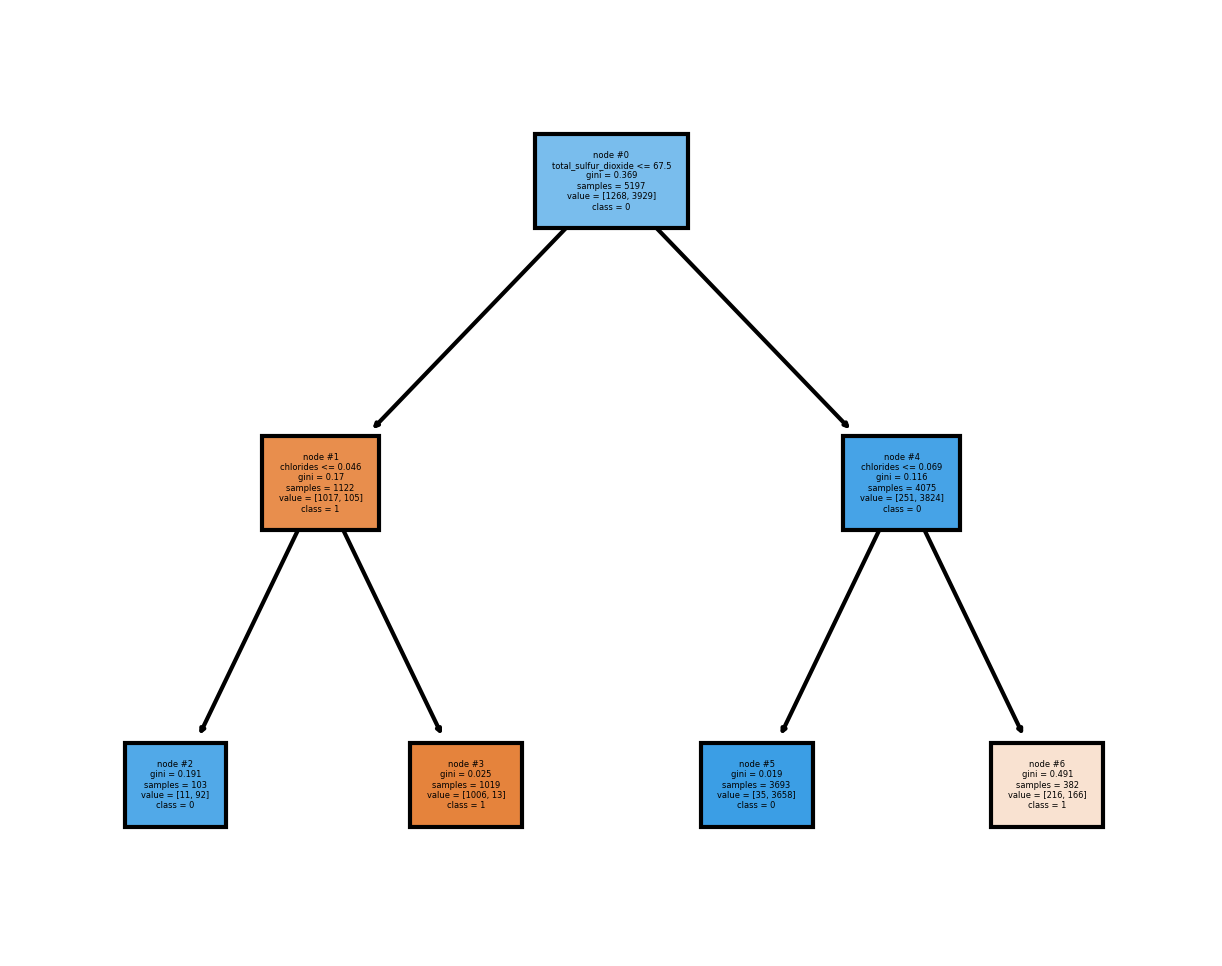

In [92]:
from sklearn import tree
import matplotlib.pyplot as plt

type=['1', '0']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=type, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

## Strategy & Prediction 

In [93]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Predicted
3435,1,6.5,0.240,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3,6.0,1
1164,1,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6.0,1
4225,1,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5.0,1
841,1,8.7,0.230,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7.0,1
5971,0,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,6.0,0


#### # Final accuracy of model after pruning 

In [94]:
from sklearn.metrics import classification_report
print(classification_report(train['type'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1268
           1       0.99      0.95      0.97      3929

    accuracy                           0.96      5197
   macro avg       0.93      0.96      0.94      5197
weighted avg       0.96      0.96      0.96      5197




* Accuracy of Model is 98%,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 98 % ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 98 % (Specificity)


## Prediction on test Data 

In [60]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
2934,5.3,0.21,0.29,0.7,0.028,11.0,66.0,0.99215,3.30,0.40,9.8,5.0,1
6426,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6.0,0
4985,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5.0,0
1237,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5.0,1
4433,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.4,5.0,1


In [61]:
test['Predicted']=dt.predict(X_test)
test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,Predicted
2934,5.3,0.21,0.29,0.7,0.028,11.0,66.0,0.99215,3.30,0.40,9.8,5.0,1,1
6426,7.9,0.29,0.49,2.2,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,6.0,0,0
4985,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5.0,0,0
1237,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5.0,1,1
4433,6.9,0.56,0.26,10.9,0.060,55.0,193.0,0.99690,3.21,0.44,9.4,5.0,1,1


## Model Performence Metrics on Test Data 

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['type'])
print(confusion_matrix)

[[313  45]
 [ 18 924]]


#### # Accuracy with Sensitivity and Specificity of Test Data 

In [63]:
from sklearn.metrics import classification_report
print(classification_report(test['type'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       331
           1       0.98      0.95      0.97       969

    accuracy                           0.95      1300
   macro avg       0.93      0.95      0.94      1300
weighted avg       0.95      0.95      0.95      1300



* Accuracy of Model is 96 %,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 93 % ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 97 % (Specificity)


#### # Model Improvement by Pruning Method ( Cut Tree) 

In [64]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

#### # After Running this go back then run from  Plotting the Graph


## Gride Search Method 

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 270]},
             verbose=1)

In [66]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=70, min_samples_split=100,
                       random_state=42)

#### Finally
* Accuracy of Model is 100 %,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 100 % ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 100 %


In [67]:
import pickle

pickle.dump(dt, open('model1.pkl','wb'))
Finalmodel=pickle.load(open('model1.pkl','rb'))

## Decision Tree Finish 

# ------------------------------------------------------------------- 

# 3) Random Forest 

# ***************************************************

## Outlier and Treatment 

## Labeling Data 

In [68]:
New.head() #Taking top 5 rows

AttributeError: 'DecisionTreeClassifier' object has no attribute 'head'

In [ ]:
New.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
New_num = New[New.select_dtypes(include=[np.number]).columns.tolist()]
New_num.head()

In [ ]:
New_dummies = New[New.select_dtypes(include=['object']).columns.tolist()]
New_dummies.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
New_dummies=New_dummies.apply(LabelEncoder().fit_transform)
New_dummies.head()
# label in ascending order

In [ ]:
New = pd.concat([New_num, New_dummies],axis=1)
New.head()

## Data Partition 

In [ ]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = New.drop('type', axis = 1)
Y = New[['type']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=2, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=80,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

## Importance Feature 

In [ ]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="gist_ncar", orient='h')


## Random Forest Visulization 

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [ ]:
tree = Model.estimators_[1]  # specify the tree number   
Taste=['1','0'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Taste,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

## Prediction on Train Dataset 

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

In [ ]:
train['Predicted']=Model.predict(X_train)
train.head()

## Model Performence matrics  

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['type'], train['Predicted'])
print(confusion_matrix)

#### # Accuracy with Sensitivity and Specificity of Train Data 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['type'], train['Predicted']))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_


* Accuracy of Model is 99 %,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 97 % ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 100 % (Specificity)


## Prediction on Test Dataset 

In [ ]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

In [ ]:
test['Predicted']=Model.predict(X_test)
test.head()

## Model Performence Metrics on Test Data 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['type'])
print(confusion_matrix)

#### # Accuracy with Sensitivity and Specificity of Test Data 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['type'], test['Predicted']))

#### Finally
* Accuracy of Model is 99 %,Hence Model is Over Fit <br>
* Accuracy of Bad Customer Capture by Model is 96 % ( Sensitivity ) <br>
* Accuracy of Good Customer Capture by Model is 100 % (Specificity)


## Random Forest Finish 

In [ ]:
from  sklearn.ensemble import RandomForestClassifier
accuracy_score(y_test,RandomForestClassifier().fit(X_train,y_train).predict(X_test))

In [ ]:
dec = DEC(kernel='rbf')
dec.fit(X_train,_train)